## Simetrik-TIMTest (2020)


### Overview & Purpose
Con esta prueba buscamos conocer tus capacidades para trabajar bajo presión, tus conocimientos sobre bases de datos, tu proactividad y la velocidad con la que te puedes adaptar.

### Requirements
1. Conexión a Internet.
2. Cualquier Motor de Bases de Datos que te permita cargar y hacer queries de la información que te compartiremos.
3. Navegador Web (como Mozilla o Google Chrome).
4. Toda tu disposición para trabajar totalmente concentrado y sin distracciones (en estado de Flow).

### Objectives
1. Entender el caso de uso descrito.
2. Cargar la información compartida en un motor de bases de datos.
3. Analizar, documentar y responder los interrogantes que se plantean en el ejercicio.
4. Al finalizar, entregar los resultados en el formulario de evaluación.

### Verification
Se verificarán los siguientes aspectos:
1. Porcentaje de cruce (conciliación) alcanzado.
2. Número de transacciones conciliadas.
3. Monto conciliado.
4. Validez, consistencia y confiabilidad de la conciliación realizada.
5. Código escrito.

### Advise
Haz tu plan de trabajo, define los tiempos que dedicarás a cada actividad antes de empezar.
Tiempo para la prueba: 1 día a partir de...

### Activity
Uno de nuestros clientes, CLAP, maneja Datafonos y se encarga de procesar pagos. SIMETRIK es aliado para comparar las transacciones que se reportan a través de sus dispositivos contra las transacciones que se registran en las liquidaciones bancarias (BANSUR).

Cada vez que el cliente CLAP reporta un pago con su datáfono, envía un registro a su base de datos y la base de datos de la adquirente BANSUR. Sin embargo, dada la gran cantidad de pagos que se realizan a diario, CLAP no puede llevar un control efectivo de todas las transacciones realizadas y necesitan verificar que todas las transacciones registradas en su base de datos también se encuentren en la base de BANSUR.

**IMPORTANTE:** Una transacción regular se evidencia en la base de datos como un PAGO; se debe tener en cuenta que un mismo ID puede también tomar estado de Cancelación, Chargeback u Otros casos.

Simetrik considera una partida como conciliable toda aquella transacción cuyo último estado en la base de datos, ordenado por fecha y hora, sea PAGADA.

Para esto, SIMETRIK comparará para cada transacción campos únicos entre las dos entidades buscando encontrar parejas que sean exactamente iguales bajo las siguientes condiciones:

1. Que tengan el mismo ID.
2. Que tengan los mismos 6 primeros dígitos de la tarjeta.
3. Que tengan los mismos 4 últimos dígitos de la tarjeta.
4. Que el valor pagado en la transacción sea igual o que su diferencia esté en el rango de más o menos 0.99 pesos.
5. Que tengan la misma fecha de transacción.


## GENERAL

### LIBRERIAS

In [207]:
# Importo las librerías necesarias
import pandas as pd  # Para el manejo de dataframes
import numpy as np  # Para la creación de arrays y el manejo de estadísticas
import scipy.stats as st  # Para la obtención de estadísticas
import sqlite3  # Para trabajar con bases de datos SQLite
import plotly.express as px

### BBDD

In [208]:
# Establezco la conexión a la base de datos 'OPERACIONES.db' y creo un cursor
db_operaciones = sqlite3.connect('../datos/sql/OPERACIONES.db')
cursor = db_operaciones.cursor()

In [209]:
# Defino una función llamada query_dml para ejecutar consultas DML y devolver los registros resultantes.
def query_dml(query):
    try:
        # Utilizo el cursor para ejecutar la consulta.
        cursor.execute(query)

        # Obtengo los resultados de la consulta y los almaceno en la variable 'registros'.
        registros = cursor.fetchall()

        print('Query ejecutado con éxito.')

        # Verifico si hay registros en la respuesta antes de devolverlos.
        if registros:
            # Devuelvo los registros resultantes de la consulta.
            return registros
        else:
            print('La consulta no retornó registros.')

    except:
        print('Hubo un error al realizar el query en la base de datos.')


## TABLA CLAP

In [210]:
# Leo el archivo CSV procesado y cargo los datos en un dataframe df_clap
df_clap = pd.read_csv('../datos/csv/procesados/CLAP.csv')


### CREACION

In [211]:
# Creo una tabla en la base de datos 'OPERACIONES.db' si no existe
query = ('''
    CREATE TABLE IF NOT EXISTS CLAP (
        OPERACION_ID INTEGER PRIMARY KEY AUTOINCREMENT,
        INICIO_TARJETA INT,
        FINAL_TARJETA INT,
        TIPO_TRX VARCHAR(20),
        MONTO REAL,
        FECHA_TRANSACCION DATETIME,
        CODIGO_AUTORIZACION VARCHAR(20), 
        ID_BANCO REAL,
        FECHA_RECEPCION_BANCO DATETIME,
        FALTANTES VARCHAR(20),
        HORA_TRANSACCION INT,
        MINUTO_TRANSACCION INT
    )
''')

query_dml(query)


Query ejecutado con éxito.
La consulta no retornó registros.


### DML QUERIES

In [212]:
# Transferimos los datos de las columnas seleccionadas del DataFrame a la tabla 'CLAP' en la base de datos.
# Si la tabla ya existe, añadimos los datos al final (append) sin considerar el índice del DataFrame.
df_clap.to_sql('CLAP', db_operaciones, if_exists='append', index=False)

# Confirmamos los cambios realizados en la base de datos para hacerlos permanentes.
db_operaciones.commit()


In [213]:
# Realizamos una consulta SQL para seleccionar los primeros 10 registros de la tabla 'CLAP'.
query = 'SELECT * FROM CLAP LIMIT 10'

# Utilizamos la función query_dml() para ejecutar la consulta y obtener los registros.
registros = query_dml(query)

# Mostramos los registros obtenidos.
# Iteramos a través de cada resultado en la lista 'registros' y los imprimimos en la consola.
for registro in registros:
    print(registro)


Query ejecutado con éxito.
(1, 443715, 190, 'CANCELADA', 21944.0, '2020-11-01', '136719', 47100185686.0, '2020-11-05', 'COMPLETO', 7, 50)
(2, 802414, 6615, 'PAGADA', 42.51, '2020-11-01', '053042', 29607730901.0, '2020-11-02', 'COMPLETO', 4, 35)
(3, 818156, 672, 'NO APLICA', 20.8, '2020-11-01', None, 497363207741.0, '2020-11-02', 'VERIFICAR', 4, 35)
(4, 954015, 5581, 'PAGADA', 41.0, '2020-11-01', '013616', 441622557487.0, '2020-11-02', 'COMPLETO', 4, 35)
(5, 954015, 2538, 'PAGADA', 68.0, '2020-11-01', '013602', 266554946896.0, '2020-11-02', 'COMPLETO', 4, 35)
(6, 954015, 2581, 'PAGADA', 144.0, '2020-11-01', '013626', 106967585923.0, '2020-11-02', 'COMPLETO', 4, 35)
(7, 818156, 8094, 'PAGADA', 189.5, '2020-11-01', '053064', 890554602678.0, '2020-11-02', 'COMPLETO', 4, 35)
(8, 946891, 1670, 'NO APLICA', 776.6, '2020-11-01', 'H37254', 249718452281.0, '2020-11-02', 'COMPLETO', 4, 35)
(9, 958758, 4254, 'PAGADA', 27.54, '2020-11-01', '151121', 243262174009.0, '2020-11-02', 'COMPLETO', 4, 35)


## TABLA BANSUR

In [214]:
# Cargamos datos desde un archivo CSV y los almacenamos en un DataFrame llamado 'df_bansur'.
df_bansur = pd.read_csv('../datos/csv/procesados/BANSUR.csv')

### DDL QUERIES

In [215]:
# Definimos una consulta SQL para crear una tabla llamada 'BANSUR' en la base de datos, si no existe.
# La tabla tiene varias columnas con tipos de datos específicos.
query = '''
    CREATE TABLE IF NOT EXISTS BANSUR (
        OPERACION_ID INTEGER PRIMARY KEY AUTOINCREMENT,
        TARJETA REAL,
        TIPO_TRX VARCHAR(30),
        MONTO FLOAT,
        FECHA_TRANSACCION DATETIME,
        CODIGO_AUTORIZACION VARCHAR(20),
        ID_ADQUIRIENTE REAL,
        FECHA_RECEPCION DATETIME,
        FALTANTES VARCHAR(20)
    );
'''

query_dml(query)


Query ejecutado con éxito.
La consulta no retornó registros.


### DML QUERIES

In [216]:
# Transferimos los datos del DataFrame 'df_bansur' a la tabla 'BANSUR' en la base de datos.
# Si la tabla 'BANSUR' ya existe, añadimos los datos al final (append) sin incluir el índice del DataFrame.
df_bansur.to_sql('BANSUR', db_operaciones, if_exists='append', index=False)

# Confirmamos los cambios realizados en la base de datos para hacerlos permanentes.
db_operaciones.commit()


In [217]:
# Ejecutamos una consulta SQL para seleccionar los primeros 10 registros de la tabla 'BANSUR'.
query = 'SELECT * FROM BANSUR LIMIT 10'

# Utilizamos la función query_dml() para ejecutar la consulta y obtener los registros.
registros = query_dml(query)

# Mostramos los registros obtenidos.
# Iteramos a través de cada resultado en la lista 'registros' y los imprimimos en la consola.
for registro in registros:
    print(registro)


Query ejecutado con éxito.
(1, 9540150300.0, 'PAGO', 44.0, '2020-11-01', '272012', 320720237226.0, '2020-11-03', 'COMPLETO')
(2, 9540150300.0, 'PAGO', 93.0, '2020-11-01', '216149', 812801092295.0, '2020-11-03', 'COMPLETO')
(3, 9540150310.0, 'PAGO', 1579.0, '2020-11-01', '898544', 563080775636.0, '2020-11-03', 'COMPLETO')
(4, 9540150319.0, 'PAGO', 86.0, '2020-11-01', '501928', 924685088703.0, '2020-11-03', 'COMPLETO')
(5, 9540150314.0, 'PAGO', 679.0, '2020-11-01', '170207', 35452614774.0, '2020-11-03', 'COMPLETO')
(6, 9540150347.0, 'PAGO', 75.0, '2020-11-01', '009187', 603396947906.0, '2020-11-03', 'COMPLETO')
(7, 9540150383.0, 'PAGO', 525.0, '2020-11-01', '055165', 153266978.0, '2020-11-03', 'COMPLETO')
(8, 9540150382.0, 'PAGO', 150.0, '2020-11-01', '912471', 217691630619.0, '2020-11-03', 'COMPLETO')
(9, 9540150320.0, 'PAGO', 45.15, '2020-11-01', '440954', 773873869693.0, '2020-11-03', 'COMPLETO')
(10, 9540150361.0, 'PAGO', 252.72, '2020-11-01', '990646', 23419715445.0, '2020-11-03', '

## PREGUNTAS
1. Escriba el código de SQL que le permite conocer el monto y la cantidad de las transacciones que SIMETRIK considera como conciliables para la base de CLAP

2. Escriba el código de SQL que le permite conocer el monto y la cantidad de las transacciones que SIMETRIK considera como conciliables para la base de BANSUR

3. ¿Cómo se comparan las cifras de los puntos anteriores respecto de las cifras totales en las fuentes desde un punto de vista del negocio?

4. Teniendo en cuenta los criterios de cruce entre ambas bases conciliables, escriba una sentencia de SQL que contenga la información de CLAP y BANSUR; agregue una columna en la que se evidencie si la transacción cruzó o no con su contrapartida y una columna en la que se inserte un ID autoincremental para el control de la conciliación

5. Diseñe un código que calcule el porcentaje de transacciones de la base conciliable de CLAP cruzó contra la liquidación de BANSUR.

6. Diseñe un código que calcule el porcentaje de transacciones de la base conciliable de BANSUR no cruzó contra la liquidación de CLAP.


### 1)
Escriba el código de SQL que le permite conocer el monto y la cantidad de las transacciones que SIMETRIK considera como conciliables para la base de CLAP

In [218]:
# Ejecutamos una consulta SQL para calcular el total de montos y la cantidad de pagos únicos en la tabla 'CLAP'.
query = '''
    SELECT sum(MONTO) as total_pagos, COUNT(*) AS cantidad_pagos
    FROM (
        SELECT *
        FROM CLAP
        WHERE (INICIO_TARJETA, FINAL_TARJETA, CODIGO_AUTORIZACION, FECHA_TRANSACCION) IN (
            SELECT INICIO_TARJETA, FINAL_TARJETA, CODIGO_AUTORIZACION, MAX(FECHA_TRANSACCION) AS UltimaFecha
            FROM CLAP
            WHERE TIPO_TRX = 'PAGADA'
            GROUP BY INICIO_TARJETA, FINAL_TARJETA, CODIGO_AUTORIZACION
        )
    ) AS PagosConciliados;
'''

# Utilizamos la función query_dml() para ejecutar la consulta y obtener los resultados.
resultado = query_dml(query)

# Obtenemos el monto total y la cantidad de pagos a partir de los resultados.
cc_monto_total = resultado[0][0]
cc_cantidad = resultado[0][1]

# Creamos un diccionario para almacenar el monto total y la cantidad de pagos.
clap_monto_totalpagos = {
    'Monto total: ': cc_monto_total,
    'Cantidad: ': cc_cantidad
}

# Mostramos el diccionario con el monto total y la cantidad de pagos.
clap_monto_totalpagos


Query ejecutado con éxito.


{'Monto total: ': 61083701.26999945, 'Cantidad: ': 147341}

### Respuesta

En relación a la tabla de Clap, se puede observar que:

- La cantidad de transacciones conciliadas es de **147,341**.
- El monto total de las transacciones conciliadas asciende a **$61,083,701.26**.

### 2)
Escriba el código de SQL que le permite conocer el monto y la cantidad de las transacciones que SIMETRIK considera como conciliables para la base de BANSUR

In [219]:
# Ejecutamos una consulta SQL para calcular el total de montos y la cantidad de pagos únicos en la tabla 'BANSUR'.
query = '''
    SELECT sum(MONTO) as total_pagos, COUNT(*) AS cantidad_pagos
    FROM (
        SELECT *
        FROM BANSUR
        WHERE (TARJETA, CODIGO_AUTORIZACION, FECHA_TRANSACCION) IN (
            SELECT TARJETA, CODIGO_AUTORIZACION, MAX(FECHA_TRANSACCION) AS UltimaFecha
            FROM BANSUR
            WHERE TIPO_TRX = 'PAGO' 
            GROUP BY TARJETA, CODIGO_AUTORIZACION
        )
    ) AS PagosConciliados;
'''

# Utilizamos la función query_dml() para ejecutar la consulta y obtener los resultados.
resultado = query_dml(query)

# Obtenemos el monto total y la cantidad de pagos a partir de los resultados.
bc_monto_total = resultado[0][0]
bc_cantidad = resultado[0][1]

# Creamos un diccionario para almacenar el monto total y la cantidad de pagos.
bansur_monto_totalpagos = {
    'Monto total: ': bc_monto_total,
    'Cantidad: ': bc_cantidad
}

# Mostramos el diccionario con el monto total y la cantidad de pagos.
bansur_monto_totalpagos


Query ejecutado con éxito.


{'Monto total: ': 53980675.02999962, 'Cantidad: ': 132389}

### Respuesta

En cuanto a la tabla de Bansur, los datos conciliados son los siguientes:

- Cantidad de transacciones conciliadas: **132,389**.
- Monto total de las transacciones conciliadas: **$53,980,675.02**.

### 3, 5 y 6)
- ¿Cómo se comparan las cifras de los puntos anteriores respecto de las cifras totales en las fuentes desde un punto de vista del negocio?

- Diseñe un código que calcule el porcentaje de transacciones de la base conciliable de CLAP cruzó contra la liquidación de BANSUR.

- Diseñe un código que calcule el porcentaje de transacciones de la base conciliable de BANSUR no cruzó contra la liquidación de CLAP.

In [220]:
# Ejecutamos una consulta SQL para calcular el total de montos y la cantidad de transacciones canceladas en la tabla 'BANSUR'.
query = '''
    SELECT sum(MONTO) as total_pagos, COUNT(*) AS cantidad_pagos
    FROM (
        SELECT *
        FROM BANSUR
        WHERE (TARJETA, CODIGO_AUTORIZACION, FECHA_TRANSACCION) IN (
            SELECT TARJETA, CODIGO_AUTORIZACION, FECHA_TRANSACCION
            FROM BANSUR
            WHERE TIPO_TRX = 'CANCELACION'
        )
    ) AS Pagos;
'''

# Utilizamos la función query_dml() para ejecutar la consulta y obtener los resultados.
resultado = query_dml(query)

# Obtenemos el monto total y la cantidad de transacciones canceladas a partir de los resultados.
bnc_monto_total = resultado[0][0]
bnc_cantidad = resultado[0][1]

# Creamos un diccionario para almacenar el monto total y la cantidad de transacciones canceladas.
bansur_nc_monto_totalpagos = {
    'Monto total: ': bnc_monto_total,
    'Cantidad: ': bnc_cantidad
}

# Mostramos el diccionario con el monto total y la cantidad de transacciones canceladas.
bansur_nc_monto_totalpagos


Query ejecutado con éxito.


{'Monto total: ': -3645.0, 'Cantidad: ': 109}

In [221]:
# Ejecutamos una consulta SQL para calcular el total de montos y la cantidad de transacciones canceladas y "no aplicables" en la tabla 'CLAP'.
query = '''
    SELECT sum(MONTO) as total_pagos, COUNT(*) AS cantidad_pagos
    FROM (
        SELECT *
        FROM CLAP
        WHERE (INICIO_TARJETA, FINAL_TARJETA, CODIGO_AUTORIZACION, FECHA_TRANSACCION) IN (
            SELECT INICIO_TARJETA, FINAL_TARJETA, CODIGO_AUTORIZACION, FECHA_TRANSACCION
            FROM CLAP
            WHERE TIPO_TRX = 'CANCELADA' OR TIPO_TRX = 'NO APLICA'
        )
    ) AS Pagos;
'''

# Utilizamos la función query_dml() para ejecutar la consulta y obtener los resultados.
resultado = query_dml(query)

# Obtenemos el monto total y la cantidad de transacciones canceladas y "no aplicables" a partir de los resultados.
cnc_monto_total = resultado[0][0]
cnc_cantidad = resultado[0][1]

# Creamos un diccionario para almacenar el monto total y la cantidad de transacciones canceladas y "no aplicables".
clap_nc_monto_totalpagos = {
    'Monto total: ': cnc_monto_total,
    'Cantidad: ': cnc_cantidad
}

# Mostramos el diccionario con el monto total y la cantidad de transacciones canceladas y "no aplicables".
clap_nc_monto_totalpagos


Query ejecutado con éxito.


{'Monto total: ': 5096160.979999999, 'Cantidad: ': 3549}

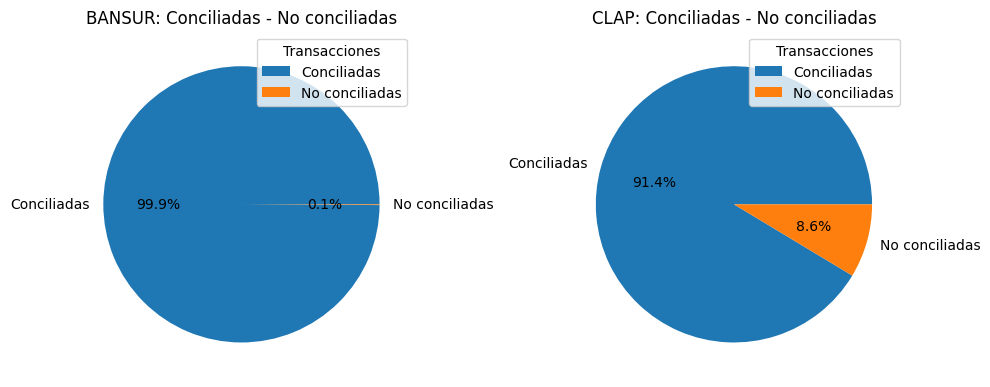

In [222]:
# Importamos la librería matplotlib para generar gráficos
import matplotlib.pyplot as plt

# Etiquetas y valores
labels = ['Conciliadas', 'No conciliadas']
bansur_values = [bansur_monto_totalpagos['Cantidad: '], bansur_nc_monto_totalpagos['Cantidad: ']]
clap_values = [bansur_monto_totalpagos['Monto total: '], clap_nc_monto_totalpagos['Monto total: ']]

# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Grafico de torta para cantidad
cantidad_pie, cantidad_texts, cantidad_autopct = axes[0].pie(bansur_values, labels=labels, autopct='%1.1f%%')
axes[0].set_title('BANSUR: Conciliadas - No conciliadas')
axes[0].legend(cantidad_pie, labels, title="Transacciones", loc="upper right")

# Grafico de torta para monto total
monto_pie, monto_texts, monto_autopct = axes[1].pie(clap_values, labels=labels, autopct='%1.1f%%')
axes[1].set_title('CLAP: Conciliadas - No conciliadas')
axes[1].legend(monto_pie, labels, title="Transacciones", loc="upper right")

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


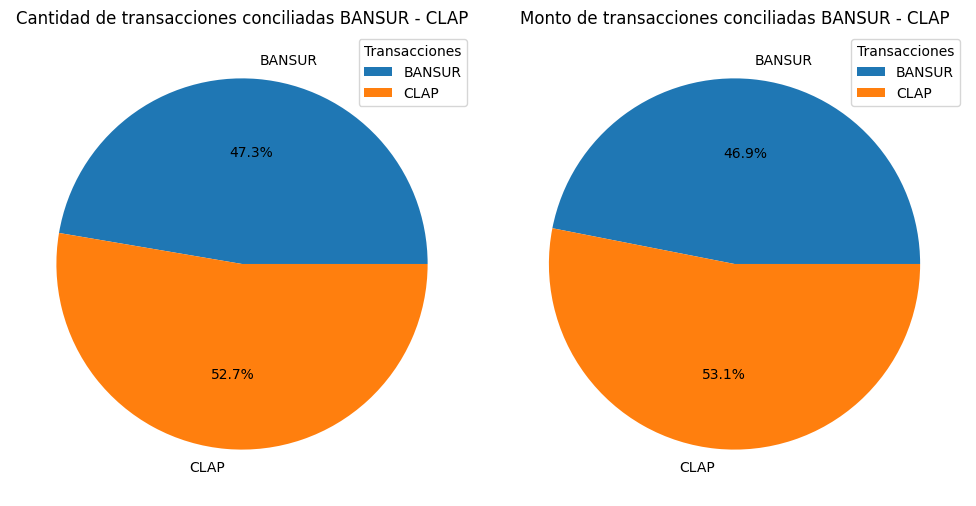

In [177]:
# Etiquetas y valores
labels = ['BANSUR', 'CLAP']
cantidad_values = [bansur_monto_totalpagos['Cantidad: '], clap_monto_totalpagos['Cantidad: ']]
monto_values = [bansur_monto_totalpagos['Monto total: '], clap_monto_totalpagos['Monto total: ']]

# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico de torta para cantidad
cantidad_pie, cantidad_texts, cantidad_autopct = axes[0].pie(cantidad_values, labels=labels, autopct='%1.1f%%')
axes[0].set_title('Cantidad de transacciones conciliadas BANSUR - CLAP')
axes[0].legend(cantidad_pie, labels, title="Transacciones", loc="upper right")

# Gráfico de torta para monto total
monto_pie, monto_texts, monto_autopct = axes[1].pie(monto_values, labels=labels, autopct='%1.1f%%')
axes[1].set_title('Monto de transacciones conciliadas BANSUR - CLAP')
axes[1].legend(monto_pie, labels, title="Transacciones", loc="upper right")

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


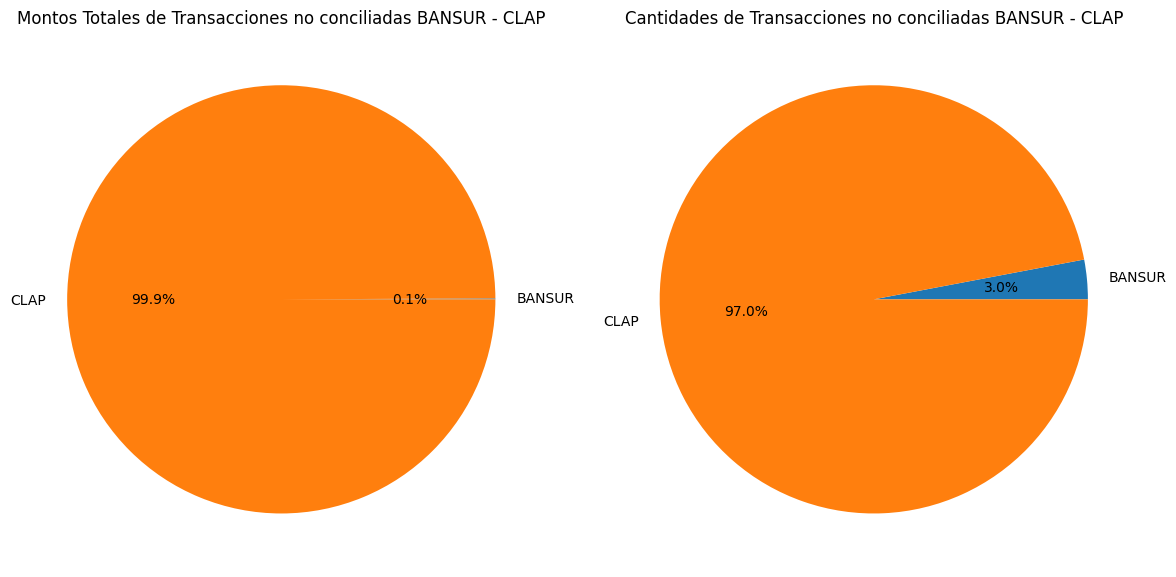

In [223]:
# Etiquetas y valores para montos
labels_montos = ['BANSUR', 'CLAP']
values_montos = [abs(bansur_nc_monto_totalpagos['Monto total: ']), clap_nc_monto_totalpagos['Monto total: ']]

# Etiquetas y valores para cantidades
labels_cantidades = ['BANSUR', 'CLAP']
values_cantidades = [bansur_nc_monto_totalpagos['Cantidad: '], clap_nc_monto_totalpagos['Cantidad: ']]

# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de torta para montos totales
axes[0].pie(values_montos, labels=labels_montos, autopct='%1.1f%%')
axes[0].set_title('Montos Totales de Transacciones no conciliadas BANSUR - CLAP')

# Gráfico de torta para cantidades
axes[1].pie(values_cantidades, labels=labels_cantidades, autopct='%1.1f%%')
axes[1].set_title('Cantidades de Transacciones no conciliadas BANSUR - CLAP')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


### Respuesta

A continuación, se presentan los datos relacionados con las transacciones consolidadas y no consolidadas para Bansur y Clap:

- **Bansur:**
  - Transacciones no consolidadas: **109**, con un monto total de **$3,645**.
  - Porcentaje respecto al total de transacciones: **8.6%**.

- **Clap:**
  - Transacciones no consolidadas: **3,549**, con un monto total de **$5,096,160.97**.
  - Porcentaje respecto al total de transacciones: **0.1%**.

Además, es importante resaltar:
- Bansur tiene un **3.0%** de sus transacciones como no consolidadas, en comparación con Clap, que presenta un aumento del **97%** en la cantidad, equivalente a un monto de **$10,185,031.95**. Esto sugiere que la mayoría de las transacciones no consolidadas no se registran en la base de datos de Bansur.

- En detalle, Bansur cuenta con un total de **132,389** transacciones consolidadas, mientras que Clap tiene **147,341** transacciones consolidadas. Estas cifras implican un monto total de **$7,103,026.24**. Esta discrepancia podría indicar una falta de consistencia en el registro de pagos en la base de datos del banco.


### 4)
Teniendo en cuenta los criterios de cruce entre ambas bases conciliables, escriba una sentencia de SQL que contenga la información de CLAP y BANSUR; agregue una columna en la que se evidencie si la transacción cruzó o no con su contrapartida y una columna en la que se inserte un ID autoincremental para el control de la conciliación


<span style="color: green">**Importante**: Dada la complejidad de la consulta SQL y que probablemente haya algún conflicto con este tipo de consultas en sqlite3 dado que incluyen procedimientos, la respondo por medio de la librería **Pandas**, de **Python**.
</span>

In [224]:
query = '''
    SELECT
        ROW_NUMBER() OVER (ORDER BY COALESCE(b.FECHA_TRANSACCION, c.FECHA_TRANSACCION)) AS ID_Conciliacion,
        COALESCE(b.TARJETA, c.INICIO_TARJETA) AS TARJETA,
        COALESCE(b.CODIGO_AUTORIZACION, c.CODIGO_AUTORIZACION) AS CODIGO_AUTORIZACION,
        COALESCE(b.FECHA_TRANSACCION, c.FECHA_TRANSACCION) AS FECHA_TRANSACCION,
        CASE
            WHEN b.TARJETA IS NOT NULL AND c.INICIO_TARJETA IS NOT NULL THEN 'Cruzada'
            ELSE 'No Cruzada'
        END AS EstadoCruce,
        b.MONTO AS Monto_BANSUR,
        c.MONTO AS Monto_CLAP
    FROM BANSUR b
    LEFT JOIN (
        SELECT
            INICIO_TARJETA, FINAL_TARJETA, CODIGO_AUTORIZACION,
            MAX(FECHA_TRANSACCION) AS FECHA_TRANSACCION,
            SUM(MONTO) AS MONTO
        FROM CLAP
        WHERE TIPO_TRX = 'PAGADA'
        GROUP BY INICIO_TARJETA, FINAL_TARJETA, CODIGO_AUTORIZACION
    ) c ON
        b.TARJETA = c.INICIO_TARJETA AND
        b.CODIGO_AUTORIZACION = c.CODIGO_AUTORIZACION
    WHERE
        b.TIPO_TRX = 'PAGO'
        OR c.TIPO_TRX = 'PAGADA';
'''

resultado = query_dml(query)
resultado

Hubo un error al realizar el query en la base de datos.


In [237]:
# Combinamos las columnas 'INICIO_TARJETA' y 'FINAL_TARJETA' en la columna 'TARJETA'
df_clap['TARJETA'] = df_clap['INICIO_TARJETA'].astype(str) + df_clap['FINAL_TARJETA'].astype(str)

# Convertimos los valores de la columna 'TARJETA' a enteros
df_clap['TARJETA'] = df_clap['TARJETA'].astype(int)


In [ ]:
# Realizar la fusión basada en las columnas comunes
df_union = pd.merge(df_clap, df_bansur, 
                     on=['TARJETA', 'FECHA_TRANSACCION', 'CODIGO_AUTORIZACION'], 
                     how='inner',
                     suffixes=('_clap', '_bansur')) 

# Filtrar los resultados según el tipo de transacción y la fecha de recepción
df_conciliada_filtrado = df_union[
    (df_union['TIPO_TRX_clap'].isin(['PAGO', 'PAGADA'])) &
    (df_union['TIPO_TRX_bansur'].isin(['PAGO', 'PAGADA']))
]


In [273]:
# Agregar una columna 'CONCILIADA' al DataFrame df_conciliada_filtrado utilizando np.where()
df_conciliada_filtrado['CONCILIADA'] = np.where(
    (df_conciliada_filtrado['TIPO_TRX_clap'].isin(['PAGO', 'PAGADA'])) &
    (df_conciliada_filtrado['TIPO_TRX_bansur'].isin(['PAGO', 'PAGADA'])),
    'CONCILIADA',
    'No conciliada'
)

# Mostrar una muestra aleatoria de 3 filas del DataFrame df_conciliada_filtrado con una semilla aleatoria fija
df_conciliada_filtrado.sample(3, random_state=4)


/var/folders/sf/zv8w99hn1570688_wf9y1h280000gn/T/ipykernel_906/2445856769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conciliada_filtrado['CONCILIADA'] = np.where(


,INICIO_TARJETA,FINAL_TARJETA,TIPO_TRX_clap,MONTO_clap,FECHA_TRANSACCION,CODIGO_AUTORIZACION,ID_BANCO,FECHA_RECEPCION_BANCO,FALTANTES_clap,HORA_TRANSACCION,MINUTO_TRANSACCION,TARJETA,TIPO_TRX_bansur,MONTO_bansur,ID_ADQUIRIENTE,FECHA_RECEPCION,FALTANTES_bansur,CONCILIADA
55532,905158,5581,PAGADA,80.0,2020-11-01,076383,8.379367e+11,2020-11-02,COMPLETO,20,57,9051585581,PAGO,80.0,837936693455,2020-11-03,COMPLETO,CONCILIADA
68604,975488,5827,PAGADA,495.0,2020-11-01,000598,9.038011e+11,2020-11-02,COMPLETO,22,10,9754885827,PAGO,495.0,903801074952,2020-11-03,COMPLETO,CONCILIADA
37828,404826,3471,PAGADA,72.5,2020-11-01,019428,2.221299e+11,2020-11-02,COMPLETO,19,15,4048263471,PAGO,72.5,222129891270,2020-11-03,COMPLETO,CONCILIADA


#### RESPUESTA

El número de pagos conciliados entre la Base de Datos de Clap y Bansur es **86817**.


## CIERRE BBDD

In [271]:
# Cerramos la conexión con la base de datos 'OPERACIONES.db'.
db_operaciones.close()
